<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/introduction-to-machine-learning-for-finance/blob/main/2022/1-notebooks/chapter-2-2.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Validation and Testing

## Underfitting and Overfitting 

When data is used for forecasting there is a danger that the machine learning model will work very well for data, but will not generalize well to other data. An obvious point is that it is important that the data used in a machine learning model be representative of the situations to which the model is to be applied. It is also important to test a model out-of-sample, by this we mean that the model should be tested on data that is different from the sample data used to determine the parameters of the model.

Data scientist refer to the sample data as the **training set** and the data used to determine the accuracy of the model as the **test set**, often a **validation set** is used as well as we explain later;

In [6]:
#
# -----> load salary_vs_age_1.csv
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './3-data/'

In [7]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'salary_vs_age_1.csv' 
# (in the same directory that your python process is based)
# Control delimiters, with read_table 
df1 = pd.read_table(path + "salary_vs_age_1.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
print(df1.head())

   Age  Salary
0   25  135000
1   27  105000
2   30  105000
3   35  220000
4   40  300000


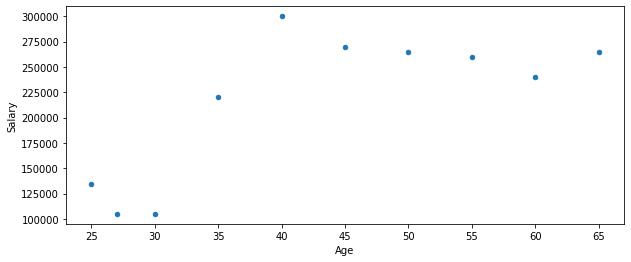

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 4]
#ax=plt.gca()

df1.plot(x ='Age', y='Salary', kind = 'scatter')
plt.show()

[polynomial fitting with pandas](https://joshualoong.com/2018/10/03/Fitting-Polynomial-Regressions-in-Python/)

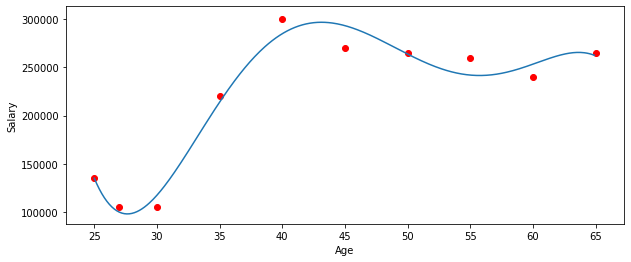

In [10]:
import numpy as np

x1 = df1['Age']
y1 = df1['Salary']

n = len(x1)

degree = 5

weights = np.polyfit(x1, y1, degree)
model   = np.poly1d(weights)

xx1 = np.arange(x1[0], x1[n-1], 0.1)
plt.plot(xx1, model(xx1))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x1,y1, color='red')
plt.show()

In [11]:
y1  = np.array(y1)
yy1 = np.array(model(x1))

rmse = np.sqrt(np.sum((y1-yy1)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
12902.203044377431


In [15]:
#
# -----> load salary_vs_age_2.csv
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './3-data/'

In [16]:
df2 = pd.read_table(path + "salary_vs_age_2.csv", sep=";") 
x2 = df2['Age']
y2 = df2['Salary']
n  = len(x2)

y2  = np.array(y2)
yy2 = np.array(model(x2))

rmse = np.sqrt(np.sum((y2-yy2)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
38825.22050916925


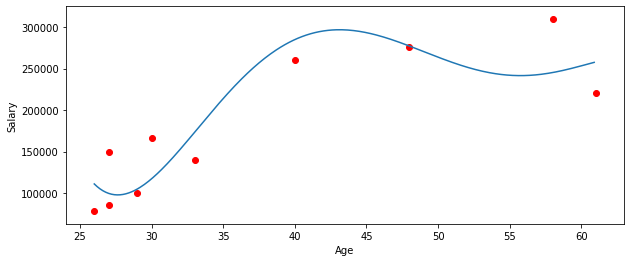

In [17]:
xx2 = np.arange(x2[0], x2[n-1], 0.1)
plt.plot(xx2, model(xx2))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x2,y2, color='red')
plt.show()

- The root mean squared error (rmse) for the training      data set is \$12,902
- The rmse for the test data set is \$38,794

We conclude that the model overfits the data. The complexity of the model should be increased only until out-of-sample tests indicate that it does not generalize well.

## Bias and Variance

Suppose there is a relationship between an independent variable $x$ and a dependent variable $y$:

\begin{equation}
    y=f(x) + \epsilon
\end{equation}

Where $\epsilon$ is an error term with mean zero and variance $\sigma^2$. The error term captures either genuine randomness in the data or noise due to measurement error.

Suppose we find a deterministic model for this relationship:

\begin{equation}
    y = \hat f(x)
\end{equation}

Now it comes a new data point $x^\prime$ not in the training set and we want to predict the corresponding $y^\prime$. The error we will observe in our model at point $x^\prime$ is going to be

\begin{equation}
    \hat f(x^\prime) - f(x^\prime) - \epsilon
\end{equation}

There are two different sources of error in this equation. The first one is included in the factor $\epsilon$, the second one, more interesting, is due to what is in our training set. A robust model should give us the same prediction whatever data we used for training out model. Let's look at the average error:

\begin{equation}
E \left[ \hat f (x^\prime ) \right] - f(x^\prime)
\end{equation}

where the expectation is taken over random samples of training data (having the same distributio as the training data). 

This is the definition of the **bias**

\begin{equation}
    \textrm{Bias} \left[\hat f (x^\prime) \right] = E \left[ \hat f (x^\prime ) \right] - f(x^\prime)
\end{equation}

We can also look at the mean square error

\begin{equation}
E \left[\left( \hat f (x^\prime ) - f(x^\prime) - \epsilon \right)^2\right] =
\left[ \textrm{Bias} \left( \hat f(x^\prime) \right) \right]^2 + \textrm{Var}\left[ \hat f(x^\prime) \right] + \sigma^2
\end{equation}

Where we remember that $\hat f (x^\prime)$ and $\epsilon$ are independent.

This show us that there are two important quantities, the **bias** and the **variance** that will affect our results and that we can control to some extent. 

**FIGURE 1.1 - A good model should have low bias and low variance**

![caption](./pic/chapter-2-2-pic_0.png)

**Bias is how far away the trained model is from the correct result on average**. Where *on average* means over many goes at training the model using different data. And **Variance is a measure of the magnitude of that error**.


Unfortunately, we often find that there is a trade-off between bias and variance. As one is reduced, the other is increased. This is the matter of over- and under-fitting.

**Overfitting is when we train our algorithm too well on training data, perhaps having too many parameters for fitting**.


<!--
<div>
<img src="bias_and_variance_1.png" width="600"/>
</div>
-->
![caption](./pic/chapter-2-2-pic_1.png)

## Understanding the scikit-learn estimator API

Scikit-learn is the most popular machine learning package in the data science community. Written in Python programming language, scikit-learn provides quite effective and easy to use tools for data processing to implementing machine learning models. Besides its huge adoption in the machine learning word, it continues to inspire packages like Keras and others with its now industry standard APIs. 

![caption](./pic/chapter-2-2_pic_23.png)

### Installing scikit-learn

After you’ve completed the python installations, you can install scikit-learn by running the following command from your terminal (or command prompt):

    pip install -U scikit-learn

If you want to use conda as your package manager, then you can install it as:

    conda install scikit-learn

Alternatively, you can install the scikit-learn package directly from your Jupiter Notebook by putting an exclamation mark (!) in front of the commands above. That is like:

    !pip install -U scikit-learn

### Simplicity of the Scikit-learn API design:

The single most important reason why scikit-learn is the most popular machine learning package out there is its simplicity. No matter you’re using a linear regression, random forest or support vector machine; you’re always calling the same functions and methods. Moreover, you can build end-to-end machine learning pipelines with a couple of codes. 

Here, we’d like to talk about a couple of apis such that you can do many of the machine learning tasks by using these. We’re talking about three basic interfaces: **estimator**, **predictor** and **transformer**.

#### Estimator

The **estimator** interface represents a machine learning model that needs to be trained on a set of data. Training a model is a central issue in any machine learning pipeline and hence we need to use this a lot. **In scikit-learn, any model can be trained easily with the fit() method of the estimator interface**. Yes, all the models regardless of regression or classification problem; supervised or unsupervised task. This is where scikit-learn’s design shines in.

#### Predictor

Similar to the estimator interface, there’s another one which is called the **predictor** interface. It expands the concept of an estimator by adding a **predict()** method and it represents a trained model. Once we have a trained model, most often than not we want to get predictions out of it and here it suffices to use the predict() method! The graph below demonstrates a machine learning pipeline where fit and predict methods come into play. Note that, instead of calling fit() and predict() separately, one can also use fit_predict() method which first train a model and then get the predictions.

![caption](./pic/chapter-2-2_pic_21.png)

### Transformer

The next interface we want to bring to your attention is the **transformer** interface. A crucial work when working with data is to transform the variables. Whether it refers to scaling a variable or vectorizing a sentence, the transformer interface enables us to do all the transformations by calling the transform() method. Usually, we use this method after the fit() method. This is because operations that are used to transform variables are also treated as estimators. Hence, calling fit() method returns an estimator trained on a data and applying transform() on a data using this estimator transforms the data. Instead of calling fit and transform methods separately, one can also use the fit_transform() method as a short-cut. The combined fit_transform method usually works more efficiently with respect to the computation time. The figure below illustrates the usage of transform in a machine learning pipeline setting:

![caption](./pic/chapter-2-2_pic_22.png)

## Partitioning a dataset into training and test datasets

In [18]:
import pandas as pd

In [19]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './3-data/'

In [20]:
# Both features and target have already been scaled: mean = 0; SD = 1
# See Chapter 4-0 for a descrition of this dataset
df = pd.read_csv(path + 'Houseprice_data_scaled.csv') 
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898


A convenient way to randomly partition this dataset into separate test and
training datasets is to use the train_test_split function from scikit-learn's
model_selection submodule.

>**Model Selection : sklearn.model_selection**
>
>The selection process for the best machine learning models is largely an iterative process where data scientists search >for the best model and the best hyper-parameters. Scikit-learn offers us many useful utilities that are helpful in both >training, testing and model selection phases. In this module, there exists utilities like KFold, train_test_split(), >GridSearchCV and RandomizedSearchCV. 

In [21]:
ncol = df.shape[1]

X = df.iloc[:, :ncol-1].values
y = df.iloc[:, ncol-1].values


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
    test_size=0.3,
    random_state=0)

First, we assigned the NumPy array representation of the feature columns from 0 to ncol-1 to
the variable X and we assigned the class labels from the last column to the variable
y. Then, we used the train_test_split function to randomly split X and y into
separate training and test datasets. By setting test_size=0.3, we assigned 30
percent of the wine examples to X_test and y_test, and the remaining 70 percent
of the examples were assigned to X_train and y_train, respectively.

## Selecting meaningful features: Regularization

In [23]:
import warnings
warnings.filterwarnings('ignore')

The reason for the overfitting is that our model is too
complex for the given training data. Common solutions to reduce the generalization
error are as follows:

- Collect more training data (Easier said that done...)
- Introduce a penalty for complexity via regularization (see section ...)
- Choose a simpler model with fewer parameters
- Reduce the dimensionality of the data

In the following
sections, we will look at common ways to reduce overfitting by regularization, which leads to simpler models by
requiring fewer parameters to be fitted to the data.

###  Ridge Regression 





Ridge regression is a regularization technique where we change the function that is to be minimize. Reduce magnitude of regression coefficients by choosing a parameter $\lambda$ and minimizing
		
\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2	+ \lambda \sum\limits_{n=1}^N \theta_i^2 \notag
\end{equation}

This change has the effect of encouraging the model to keep the weights $b_j$ as small as possibile. The Ridge regression should only be used for determining model parameters using the training set. Once the model parameters have been determined the penalty term should be removed for prediction.

In [24]:
import matplotlib.pyplot as plt

In [25]:
#
# Here we have to load the file 'salary_vs_age_1.csv'
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './3-data/'

In [26]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'salary_vs_age_1.csv' 
# (in the same directory that your python process is based)
# Control delimiters, with read_table 
df1 = pd.read_table(path + "salary_vs_age_1.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
print(df1.head())

   Age  Salary
0   25  135000
1   27  105000
2   30  105000
3   35  220000
4   40  300000


In [27]:
columns_titles = ["Salary","Age"]
df2=df1.reindex(columns=columns_titles)
df2

,Salary,Age
0,135000,25
1,105000,27
2,105000,30
3,220000,35
4,300000,40
5,270000,45
6,265000,50
7,260000,55
8,240000,60
9,265000,65


In [28]:
df2['Salary'] = df2['Salary']/1000 
df2['Age2']=df2['Age']**2
df2['Age3']=df2['Age']**3
df2['Age4']=df2['Age']**4
df2['Age5']=df2['Age']**5
df2

,Salary,Age,Age2,Age3,Age4,Age5
0,135.0,25,625,15625,390625,9765625
1,105.0,27,729,19683,531441,14348907
2,105.0,30,900,27000,810000,24300000
3,220.0,35,1225,42875,1500625,52521875
4,300.0,40,1600,64000,2560000,102400000
5,270.0,45,2025,91125,4100625,184528125
6,265.0,50,2500,125000,6250000,312500000
7,260.0,55,3025,166375,9150625,503284375
8,240.0,60,3600,216000,12960000,777600000
9,265.0,65,4225,274625,17850625,1160290625


We can compute the z-score in Pandas using the .mean() and std() methods.

In [29]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df2_standard = z_score(df2)
df2_standard['Salary'] = df2['Salary']
df2_standard

,Salary,Age,Age2,Age3,Age4,Age5
0,135.0,-1.289948,-1.128109,-0.988322,-0.873562,-0.782128
1,105.0,-1.148195,-1.045510,-0.943059,-0.849996,-0.770351
2,105.0,-0.935566,-0.909699,-0.861444,-0.803378,-0.744782
3,220.0,-0.581185,-0.651577,-0.684372,-0.687799,-0.672266
4,300.0,-0.226804,-0.353745,-0.448740,-0.510508,-0.544103
5,270.0,0.127577,-0.016202,-0.146184,-0.252677,-0.333075
6,265.0,0.481958,0.361052,0.231663,0.107030,-0.004250
7,260.0,0.836340,0.778017,0.693166,0.592463,0.485972
8,240.0,1.190721,1.234693,1.246690,1.229979,1.190828
9,265.0,1.545102,1.731080,1.900602,2.048447,2.174155


In [30]:
y = df2_standard['Salary']
X = df2_standard.drop('Salary',axis=1)

In [31]:
print(y)

0    135.0
1    105.0
2    105.0
3    220.0
4    300.0
5    270.0
6    265.0
7    260.0
8    240.0
9    265.0
Name: Salary, dtype: float64


In [32]:
print(X)

        Age      Age2      Age3      Age4      Age5
0 -1.289948 -1.128109 -0.988322 -0.873562 -0.782128
1 -1.148195 -1.045510 -0.943059 -0.849996 -0.770351
2 -0.935566 -0.909699 -0.861444 -0.803378 -0.744782
3 -0.581185 -0.651577 -0.684372 -0.687799 -0.672266
4 -0.226804 -0.353745 -0.448740 -0.510508 -0.544103
5  0.127577 -0.016202 -0.146184 -0.252677 -0.333075
6  0.481958  0.361052  0.231663  0.107030 -0.004250
7  0.836340  0.778017  0.693166  0.592463  0.485972
8  1.190721  1.234693  1.246690  1.229979  1.190828
9  1.545102  1.731080  1.900602  2.048447  2.174155


Now we implement the Ridge regularization method using the scikit-learn package [Scikit-learn](https://scikit-learn.org/stable/index.html). 

>**Metrics : sklearn.metrics**
>
>Before starting to train our models and make predictions, we always consider which performance measure should best suit >for our task at hand. Scikit-learn provides access to a variety of these metrics. Accuracy, precision, recall, mean >squared errors are among the many metrics that are available in this module.

>**Linear Models : sklearn.linear_model**
>
>Linear models are the fundamental machine learning algorithms that is heavily used in supervised learning tasks. This >module contains a family of linear methods such that the target value is expected to be a linear combination of the >features. Among the models in this module, LinearRegression is the most common algorithm for regression tasks. Ridge, >Lasso and ElasticNet are models with regularization to reduce overfitting.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))


Coefficients: 
 [ -32622.57240731  135402.73116534 -215493.11781321  155314.6136729
  -42558.76209737]
Mean squared error: 149.82


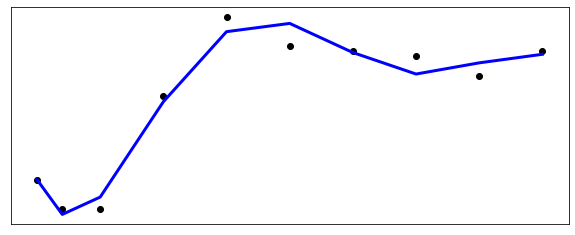

In [34]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [35]:
rr = Ridge(alpha=0.01, normalize=True) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X, y)

y_pred_r = rr.predict(X)


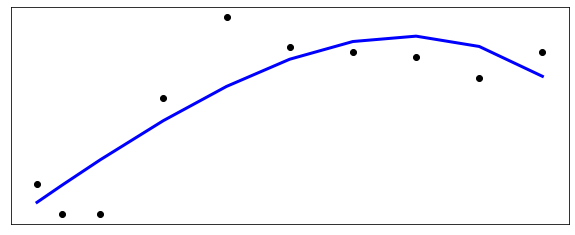

In [36]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred_r, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [37]:
# The coefficients
print('Coefficients: \n', rr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_r))

Coefficients: 
 [119.85726826  32.07576023 -24.12692453 -45.195683   -35.65836346]
Mean squared error: 1148.95


### Lasso Regression



Lasso is short for *Least Absolute Shrinkage and Selection Operator*. It is similar to ridge regression except we minimize

\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2 + \lambda \sum\limits_{n=1}^N \vert b_n \vert \notag
\end{equation}

This function cannot be minimized analytically and so a variation on the gradient descent algorithm must be used. Lasso regression also has the effect of simplifying the model. It does this by setting the weights of unimportant features to zero. When there are a large number of features, Lasso can identify a relatively small subset of the features that form a good predictive model.

In [38]:
from sklearn.linear_model import Lasso

lsr = Lasso(alpha=.02, normalize=True, max_iter=1000000) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
lsr.fit(X, y)

y_pred_lsr = lsr.predict(X)

In [39]:
# The coefficients
print('Coefficients: \n', lsr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_lsr))

Coefficients: 
 [ 344.99709034   -0.         -471.80600937   -0.          183.42041303]
Mean squared error: 854.75


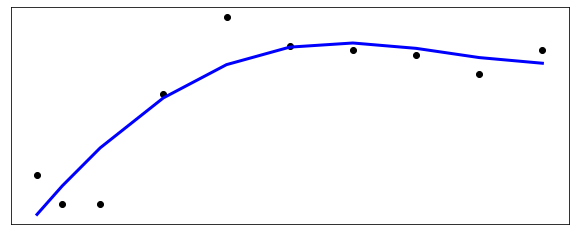

In [40]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred_lsr, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Elastic Net Regression

Middle ground between Ridge and Lasso. Minimize

\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2 + \lambda_1 \sum\limits_{n=1}^N b_n^2 + \lambda_2 \sum\limits_{n=1}^N \vert b_n \vert \notag
\end{equation}

In Lasso some weights are reduced to zero but others may be quite large. In Ridge, weights are small in magnitude but they are not reduced to zero. The idea underlying Elastic Net is that we may be able to get the best of both by making some weights zero while reducing the magnitude of the others.

In [41]:
from sklearn.linear_model import ElasticNet

# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

## Exercise

**Problem:**

Try to generate some plausible data distribution using a given function at your choice and adding some noise and plot the result using matplotlib library. Use the method `model_selection` of scikit-learn package to split the data so generated into train and test data. Test data must be 20% of entire data. Then try different form of interpolation and regularization of data. Discuss the final result.

**Answer:**

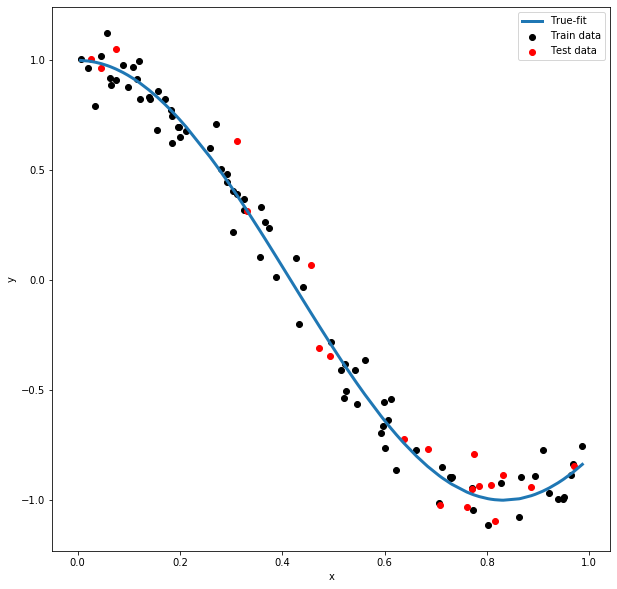

In [52]:
from sklearn import model_selection
import matplotlib.pyplot as plt
#
# Generate a random sample, here I use a cos, try with a different function    
#    
np.random.seed(42)
x = np.sort(np.random.rand(100))
y = np.cos(1.2 * x * np.pi) + (0.1 * np.random.randn(100))
#
# Total data is split into train and test data. Test data is 20% of entire data.
#
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size = 0.2)
#
# define picture size
#
fig = plt.figure(figsize = (10,10))
#
# scatter plot of train data
#
plt.scatter(X_train, Y_train, color = 'k', label = 'Train data')
#
# scatter plot of test data
#
plt.scatter(X_test, Y_test, color = 'r', label = 'Test data')
#
# plot the "true" distribution
#
plt.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True-fit')
#
# add labels and legend
#
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


In [53]:
X_train

array([0.07404465, 0.52006802, 0.52273283, 0.86310343, 0.60754485,
       0.37454012, 0.89482735, 0.73199394, 0.29214465, 0.27134903,
       0.93949894, 0.95071431, 0.11586906, 0.59789998, 0.0884925 ,
       0.10789143, 0.11959425, 0.06355835, 0.00552212, 0.15599452,
       0.30461377, 0.05808361, 0.09767211, 0.61185289, 0.70685734,
       0.86617615, 0.52475643, 0.54671028, 0.21233911, 0.32518332,
       0.9093204 , 0.35846573, 0.06505159, 0.72900717, 0.32533033,
       0.82873751, 0.19598286, 0.92187424, 0.35675333, 0.19871568,
       0.02058449, 0.18182497, 0.17052412, 0.42754102, 0.72960618,
       0.77224477, 0.77127035, 0.71324479, 0.54269608, 0.51423444,
       0.18485446, 0.13949386, 0.62329813, 0.29122914, 0.28093451,
       0.59865848, 0.5612772 , 0.49517691, 0.80219698, 0.18340451,
       0.31098232, 0.04645041, 0.38867729, 0.98688694, 0.36636184,
       0.12203823, 0.44015249, 0.94888554, 0.30424224, 0.03438852,
       0.14092422, 0.43194502, 0.59241457, 0.66252228, 0.60111

In [54]:
#
# numpy allow us to give one of new shape parameter as -1 (eg: (2,-1) or (-1,3) but not (-1, -1)). 
# It simply means that it is an unknown dimension and we want numpy to figure it out. And numpy 
# will figure this by looking at the 'length of the array and remaining dimensions' and making 
# sure it satisfies the above mentioned criteria. In other words giving an unknown number of rows and
# 1 column means simply that the entire matrix is transformed in a column vector
#
x_train = X_train.reshape(-1,1)
print(X_train.shape, x_train.shape)

(80,) (80, 1)


In [55]:
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fit_degree=1
#
# As we have seen, the sklearn.preprocessing package provides several common utility functions 
# and transformer classes to change raw feature vectors into a representation that is more suitable 
# for the downstream estimators. In particular the module PolynomialFeatures generate a new feature 
# matrix consisting of all polynomial combinations of the features with degree less than or equal 
# to the specified degree. In other words it produces the same results that we have seen above in
# paragraph 4.5.1
#
transf = preprocessing.PolynomialFeatures(degree = fit_degree)
#
# Fit the training data
#
x_train = transf.fit_transform(x_train)
#
# Choose the model (Linear Regression)
#
clf = LinearRegression()
clf.fit(x_train, Y_train)
#
# Fit the test data
#
x_test = X_test.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = fit_degree)
x_test = transf.fit_transform(x_test)
#
# Make predictions from training data
#
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(Y_train, train_predict)
print('Training MSE:', train_MSE)

test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(Y_test, test_predict)
print('Test     MSE:', test_MSE)

Training MSE: 0.040338393489346015
Test     MSE: 0.04068556089245819


In [56]:
x_model = x.reshape(-1,1)
x_model = transf.fit_transform(x_model)
y_model = clf.predict(x_model)
x_test = X_test

Text(0, 0.5, 'y')

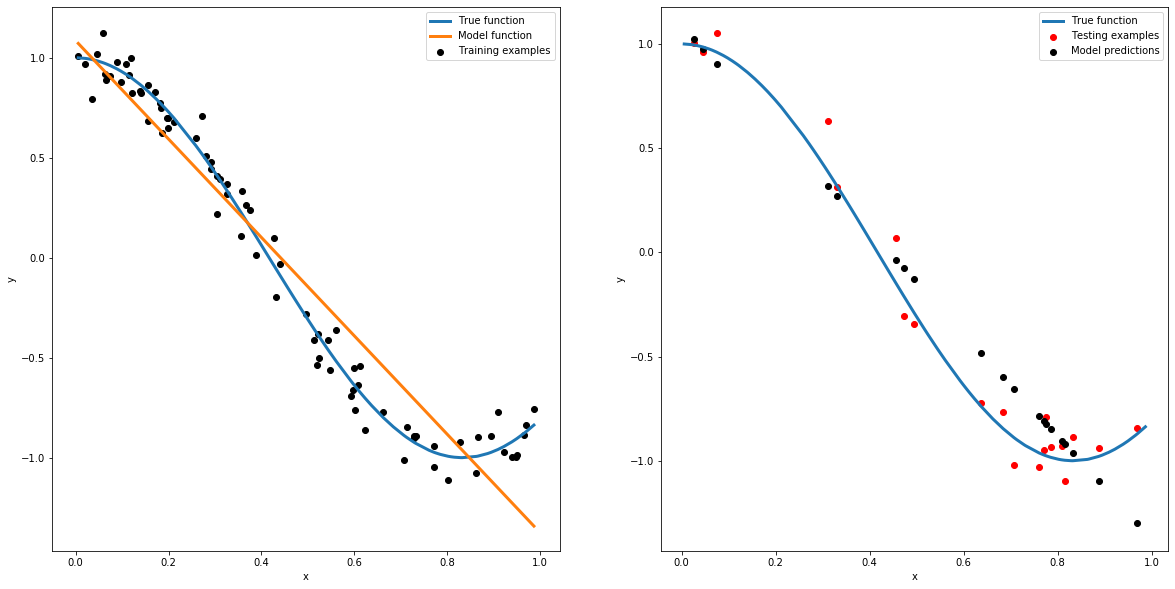

In [57]:
#
# Define picture size
#
fig = plt.figure(figsize = (20,10))
#
# Add two subplots. The subplot() function takes three arguments that describes the layout of the figure.
# The layout is organized in rows and columns, which are represented by the first and second argument.
# The third argument represents the index of the current plot.
#
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#
# Plot of training sample
#
ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
#
# Plot of test sample
#
ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
#
# Add legend and labels
#
plt.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

In [58]:
def ridge_reg(lamda):
    #
    # The code should be clear since it's a simple generalization of the previous one 
    #
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_train = transf.fit_transform(x_train)
    #
    # Model choice. This time we choose Ridge model
    #
    clf = Ridge(alpha = lamda)
    clf.fit(x_train, Y_train)
    train_accuracy = clf.score(x_train, Y_train)
    intercept = clf.intercept_
    coefficient = clf.coef_
    parameters = coefficient + intercept
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_test = transf.fit_transform(x_test)
    test_accuracy = clf.score(x_test, Y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(Y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(Y_test, test_predict)
    print('Train accuracy:', train_accuracy, '\n')
    print('Test accuracy:', test_accuracy, '\n')
    print('Train MSE', train_MSE, '\n')
    print('Test MSE', test_MSE, '\n')
    print('Parameters:', parameters)
    x_model = x.reshape(-1,1)
    x_model = transf.fit_transform(x_model)
    y_model = clf.predict(x_model)
    x_test = X_test
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
    ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
    ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
    plt.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

Train accuracy: 0.9650160151301381 

Test accuracy: 0.9610337121363199 

Train MSE 0.019492356115756792 

Test MSE 0.021406914219178307 

Parameters: [ 0.98396431 -0.69903228 -0.03195942  0.54998876  0.89610285  1.07953072
  1.16630129  1.19823375  1.19997024  1.18574468  1.1637198   1.13854438
  1.11283032  1.08800477  1.06480424  1.04356335  1.02438472  1.00723973
  0.9920284   0.97861499  0.96684914]


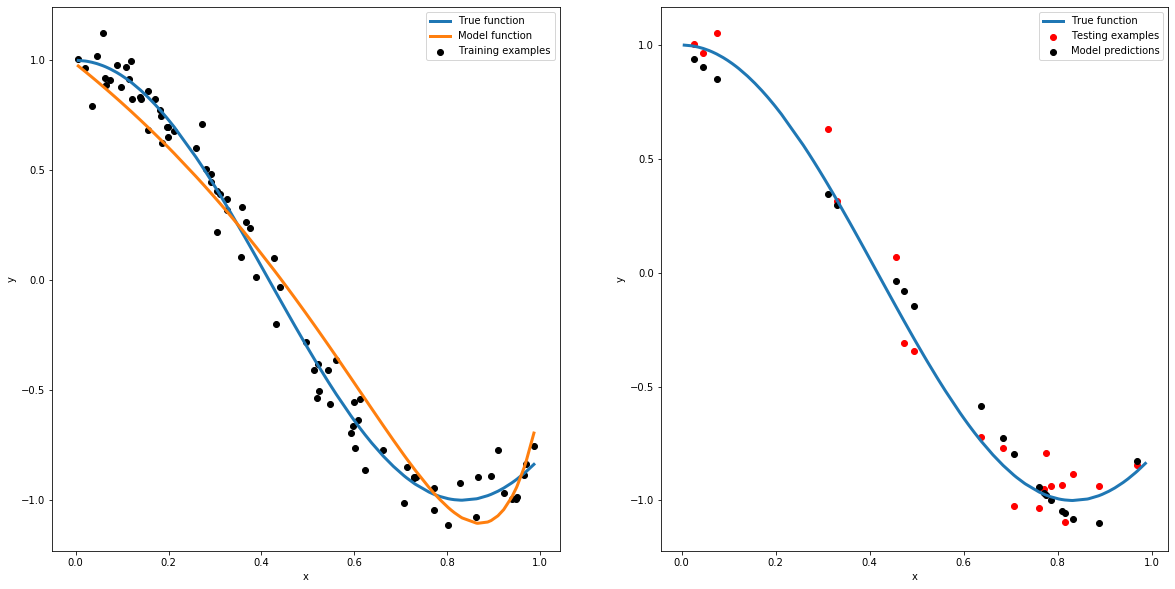

In [59]:
ridge_reg(0.6)

In [60]:
def lasso_reg(lamda):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_train = transf.fit_transform(x_train)
    #
    # Model choice, Lasso
    #
    clf = Lasso(alpha = lamda)
    clf.fit(x_train, Y_train)
    intercept = clf.intercept_
    coefficient = clf.coef_
    parameters = coefficient + intercept
    train_accuracy = clf.score(x_train, Y_train)
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_test = transf.fit_transform(x_test)
    test_accuracy = clf.score(x_test, Y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(Y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(Y_test, test_predict)
    print('Train accuracy:', train_accuracy, '\n')
    print('Test accuracy:', test_accuracy, '\n')
    print('Train MSE', train_MSE, '\n')
    print('Test MSE', test_MSE, '\n')
    print('Parameters:', parameters)
    x_model = x.reshape(-1,1)
    x_model = transf.fit_transform(x_model)
    y_model = clf.predict(x_model)
    x_test = X_test
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
    ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
    ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
    plt.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

Train accuracy: 0.980329537107391 

Test accuracy: 0.971525880509632 

Train MSE 0.010959976946331978 

Test MSE 0.015642830426377066 

Parameters: [ 1.15209052 -1.17542891  0.05743092  1.15209052  1.15209052  1.15209052
  2.31008147  1.55700984  1.15209052  1.15209052  1.15209052  1.15209052
  1.15209052  1.15209052  1.15209052  1.15209052  1.15209052  1.15209052
  1.15209052  1.15209052  1.15209052]


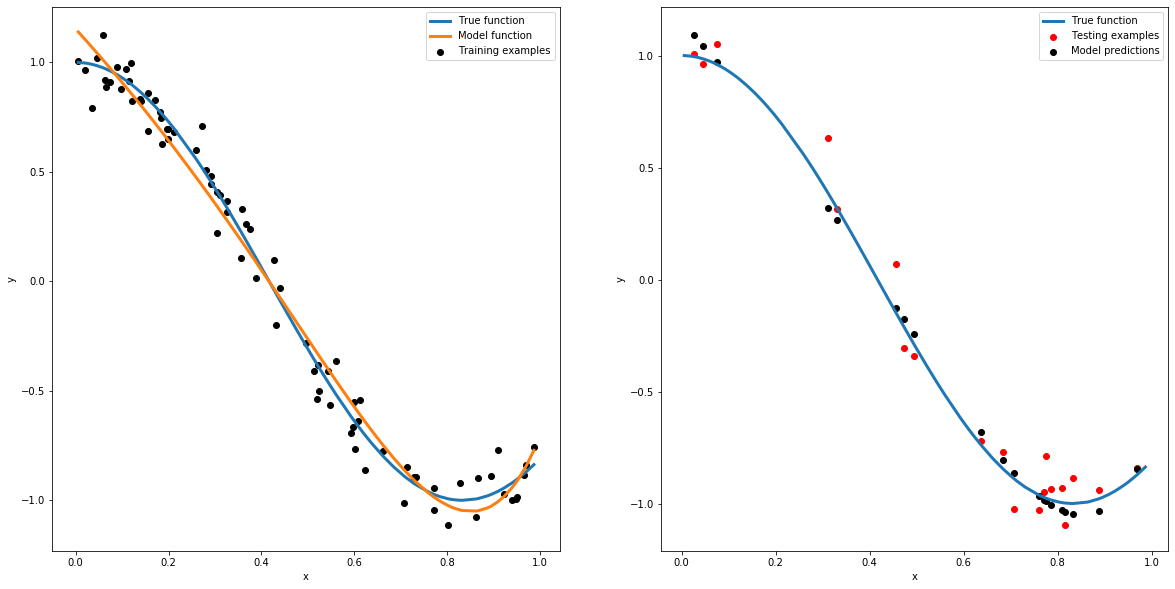

In [61]:
lasso_reg(.001)

## References

 **A. Géron**, "*Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*", 2nd Edition. O’Reilly Media, 2019  

**S. Raschka and V. Mirjalili**, "*Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2*", 3rd Edition. Packt Publishing Ltd, 2019.
     
**S. Raschka**, "*Model Evaluation, Model Selection and Algorithm Selection in Machine Learning*", downlodable [here](https://arxiv.org/pdf/1811.12808.pdf)     
     
[Scikit-Learn web site](https://scikit-learn.org/)   
